# DATASETS & DATALOADERS
1、torch.utils.data.DataLoader;
2、torch.utils.data.Dataset

## 1、加载数据集
load the FashionMNIST Dataset with the following parameters:

    root is the path where the train/test data is stored,
    train specifies training or test dataset,
    download=True downloads the data from the internet if it’s not available at root.
    transform and target_transform specify the feature and label transformations

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "./data/",
    train=True,
    download=False,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root="./data/",
    train=False,
    download=False,
    transform=ToTensor()
)

## 2、迭代和可视化

sample_idx: 47290
sample_idx: 15929
sample_idx: 58425
sample_idx: 10912
sample_idx: 20225
sample_idx: 33373
sample_idx: 24661
sample_idx: 29472
sample_idx: 22163


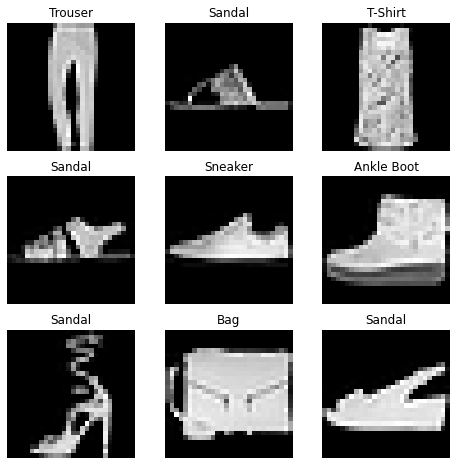

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    print('sample_idx:', sample_idx)
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[int(label.numpy())])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 3、创建自定义数据集

自定义Dataset类必须实现三个功能：__ init __，__ len__和__getitem__。

看一下这个实现；FashionMNIST图像存储在目录中img_dir，其标签分别存储在CSV文件中annotations_file

In [22]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(lable)
        sample = {"image": iamge, "label": label}
        return sample

ImportError: cannot import name 'read_image' from 'torchvision' (/root/anaconda3/envs/wood_pytorch/lib/python3.7/site-packages/torchvision/__init__.py)

## 4、准备数据训练 使用dataloader

在训练模型时，我们通常希望以“小批”方式传递样本，在每个时期重新组合数据以减少模型的过拟合，并使用Python's `multiprocessing`加快数据检索的速度。

In [24]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## 5、遍历

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


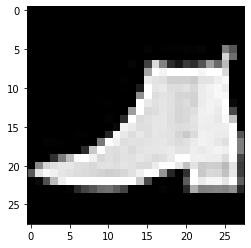

Label: 9


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")